In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [4]:
fashion_train_df


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
training = np.array(fashion_train_df, dtype='float32')

In [8]:
testing = np.array(fashion_test_df, dtype='float32')

2.0

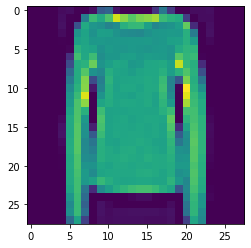

In [9]:
i = np.random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

- 0 => T-shirt/top
- 1 => Trousers
- 2 => Pullover
- 3 => Dress 
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle Boot

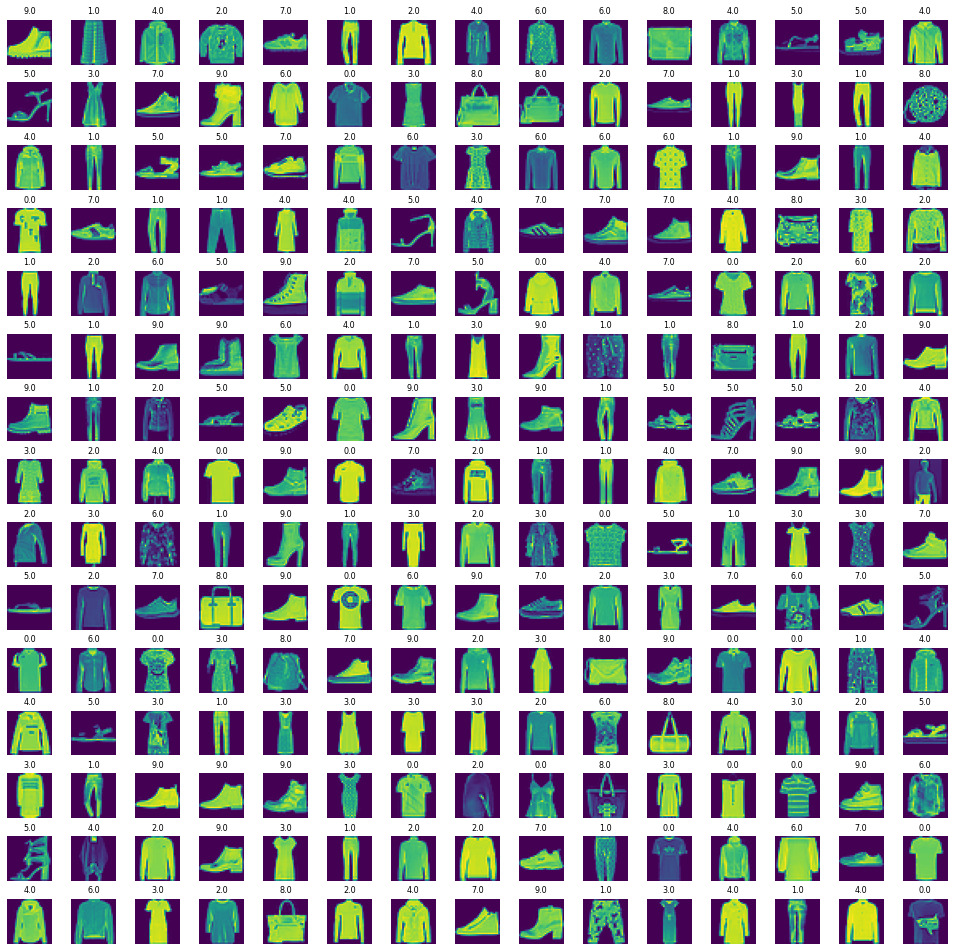

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel() # flatten 15x15 matrix into 225 array
n_training = len(training)

for i in range(0, 225):
    index = np.random.randint(0,n_training)
    axes[i].imshow(  training[index,1:].reshape((28,28))  )
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)


In [11]:
X_train = training[:, 1:]/255
X_train, X_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (60000, 784))

In [12]:
y_train = training[:, 0] 
y_train,  y_train.shape

(array([2., 9., 6., ..., 8., 8., 7.], dtype=float32), (60000,))

In [13]:
X_test = testing[:, 1:]/255
X_test,  X_test.shape 

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
         0.        ],
        [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 (10000, 784))

In [14]:
y_test = testing[:, 0]
y_test, y_test.shape

(array([0., 1., 2., ..., 8., 8., 1.], dtype=float32), (10000,))

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_validate, y_train, y_validate=train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [17]:
X_train,  X_train.shape

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.08235294, 0.03921569,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 (48000, 784))

In [18]:
X_validate,  X_validate.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (12000, 784))

In [19]:
y_train,  y_train.shape

(array([6., 5., 9., ..., 9., 7., 9.], dtype=float32), (48000,))

In [20]:
 y_validate,  y_validate.shape

(array([7., 3., 3., ..., 0., 7., 4.], dtype=float32), (12000,))

In [21]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [22]:
import keras

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [51]:
cnn_model = Sequential()

In [52]:
cnn_model.add(Conv2D(64,3,3, input_shape = (28,28,1), activation = 'relu'))

In [53]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [54]:
cnn_model.add(Flatten())

In [55]:
cnn_model.add(Dense(32, activation = 'relu'))

In [56]:
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [57]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001),metrics=['accuracy'])

In [58]:
epochs= 50

In [59]:
cnn_model.fit(X_train,
             y_train,
             batch_size = 512,
             epochs = epochs,
             verbose = 1,
             validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 2s 19ms/step - loss: 1.2663 - accuracy: 0.5898 - val_loss: 0.7460 - val_accuracy: 0.7329
Epoch 2/50
94/94 [==============================] - 2s 17ms/step - loss: 0.6650 - accuracy: 0.7597 - val_loss: 0.6043 - val_accuracy: 0.7822
Epoch 3/50
94/94 [==============================] - 2s 17ms/step - loss: 0.5685 - accuracy: 0.7924 - val_loss: 0.5398 - val_accuracy: 0.8049
Epoch 4/50
94/94 [==============================] - 2s 17ms/step - loss: 0.5220 - accuracy: 0.8105 - val_loss: 0.5036 - val_accuracy: 0.8199
Epoch 5/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4927 - accuracy: 0.8193 - val_loss: 0.4952 - val_accuracy: 0.8216
Epoch 6/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4714 - accuracy: 0.8279 - val_loss: 0.4702 - val_accuracy: 0.8336
Epoch 7/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4571 - accuracy: 0.8343 - val_loss: 0.4575 - val_accuracy: 0.8363
Epoch 8/50
94

## Evaluation

In [60]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 905us/step - loss: 0.3571 - accuracy: 0.8657
Test Accuracy : 0.866


In [61]:
predicted_classes = cnn_model.predict(X_test)

313/313 [==============================] - 0s 810us/step


In [62]:
classes_x=np.argmax(predicted_classes,axis=1)

In [63]:
classes_x

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

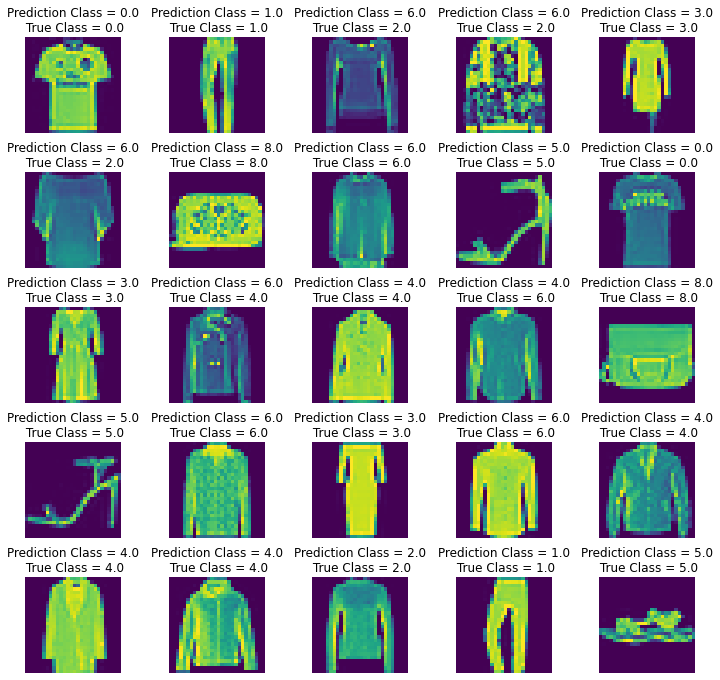

In [64]:
L = 5
W = 5
fig,axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class = {:0.1f}'.format(classes_x[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)

<AxesSubplot:>

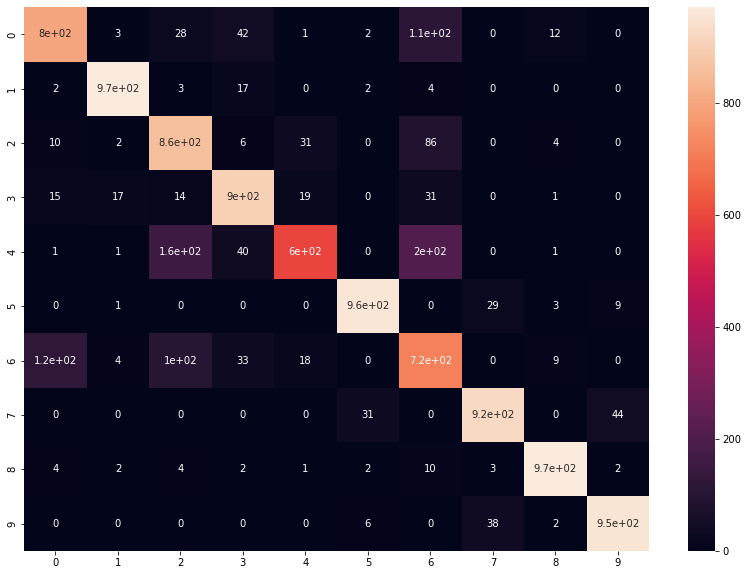

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot= True)


In [66]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Classes {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, classes_x, target_names = target_names))


              precision    recall  f1-score   support

   Classes 0       0.84      0.80      0.82      1000
   Classes 1       0.97      0.97      0.97      1000
   Classes 2       0.74      0.86      0.80      1000
   Classes 3       0.87      0.90      0.88      1000
   Classes 4       0.89      0.60      0.72      1000
   Classes 5       0.96      0.96      0.96      1000
   Classes 6       0.62      0.72      0.66      1000
   Classes 7       0.93      0.93      0.93      1000
   Classes 8       0.97      0.97      0.97      1000
   Classes 9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Improving the Model

In [68]:
# Conv2D() 64 